<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

In [276]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from ipykernel import kernelapp as app
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [277]:
#Loading and Reading the dataset.
iowa_path='../datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_path)

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [278]:
#Looking at variables which contain missing values.
iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [279]:
#The content of the dataset.
iowa.info

<bound method DataFrame.info of               Date  Store Number             City Zip Code  County Number  \
0       11/04/2015          3717           SUMNER    50674            9.0   
1       03/02/2016          2614        DAVENPORT    52807           82.0   
2       02/11/2016          2106      CEDAR FALLS    50613            7.0   
3       02/03/2016          2501             AMES    50010           85.0   
4       08/18/2015          3654          BELMOND    50421           99.0   
5       04/20/2015          2569     CEDAR RAPIDS    52402           57.0   
6       08/05/2015          2596          OTTUMWA    52501           90.0   
7       06/25/2015          3456       CLEAR LAKE    50428           17.0   
8       01/04/2016          4757        BONDURANT    50035           77.0   
9       11/10/2015          4346       SHELLSBURG    52332            6.0   
10      09/28/2015          2648  WEST DES MOINES    50265           77.0   
11      10/28/2015          2600        OSKA

In [280]:
#Rows and columns in the dataset.
iowa.shape

(270955, 18)

In [281]:
#Summary of the dataset.
iowa.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [282]:
#Taking a look at the first three rows of the dataset.
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34



## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [283]:
#Checking to see what the variables are defined as. 
iowa.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

From the above output, it can be observed that the variables: "State Bottle Cost","State Bottle Retail", and "Sale (Dollars)" are considered as objects. 

In [284]:
#looking to see why the State Bottle Cost column is not numeric.
iowa["State Bottle Cost"][0:4]

0     $4.50
1    $13.75
2    $12.59
3     $9.50
Name: State Bottle Cost, dtype: object

In [285]:
iowa["Sale (Dollars)"][0:4]

0     $81.00
1     $41.26
2    $453.36
3     $85.50
Name: Sale (Dollars), dtype: object

In [286]:
#Finding all the rows where a specific column holds NaN values.
iowa[ pd.isnull(iowa['Category'])][0:4]
iowa[ pd.isnull(iowa['County Number'])][0:4]
iowa[ pd.isnull(iowa['County Number'])][0:4]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
135,01/20/2016,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,$3.22,$4.83,24,$115.92,9.00,2.38
198,03/02/2016,3820,SIOUX CITY,51103,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200,$5.00,$7.50,12,$90.00,2.40,0.63
272,03/21/2016,4222,EVANSDALE,50707,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750,$7.49,$11.24,3,$33.72,2.25,0.59
290,03/21/2016,5236,ANAMOSA,52205,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,Fireball Cinnamon Whiskey,1750,$15.33,$23.00,6,$138.00,10.50,2.77


### 3.2 Clean the columns

In [287]:
#Removing the dollar sign from the values.
iowa['State Bottle Cost']=iowa['State Bottle Cost'].str.replace('$','')
iowa['State Bottle Retail']=iowa['State Bottle Retail'].str.replace('$','')
iowa['Sale (Dollars)']=iowa['Sale (Dollars)'].str.replace('$','')

In [288]:
#changing the object columns to numeric.
iowa["State Bottle Cost"]= pd.to_numeric(iowa["State Bottle Cost"],
                                         errors="coerce")

iowa["State Bottle Retail"]= pd.to_numeric(iowa["State Bottle Retail"],
                                         errors="coerce")
iowa["Sale (Dollars)"]= pd.to_numeric(iowa["Sale (Dollars)"],
                                         errors="coerce")


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [289]:
#Renaming variables
iowa = iowa.rename(index=str, columns={ "Sale (Dollars)": "Sale_Dollars", "State Bottle Cost": "State_Bottle_Cost", "State Bottle Retail": "State_Bottle_Retail", "Bottles Sold": "Bottles_Sold"})

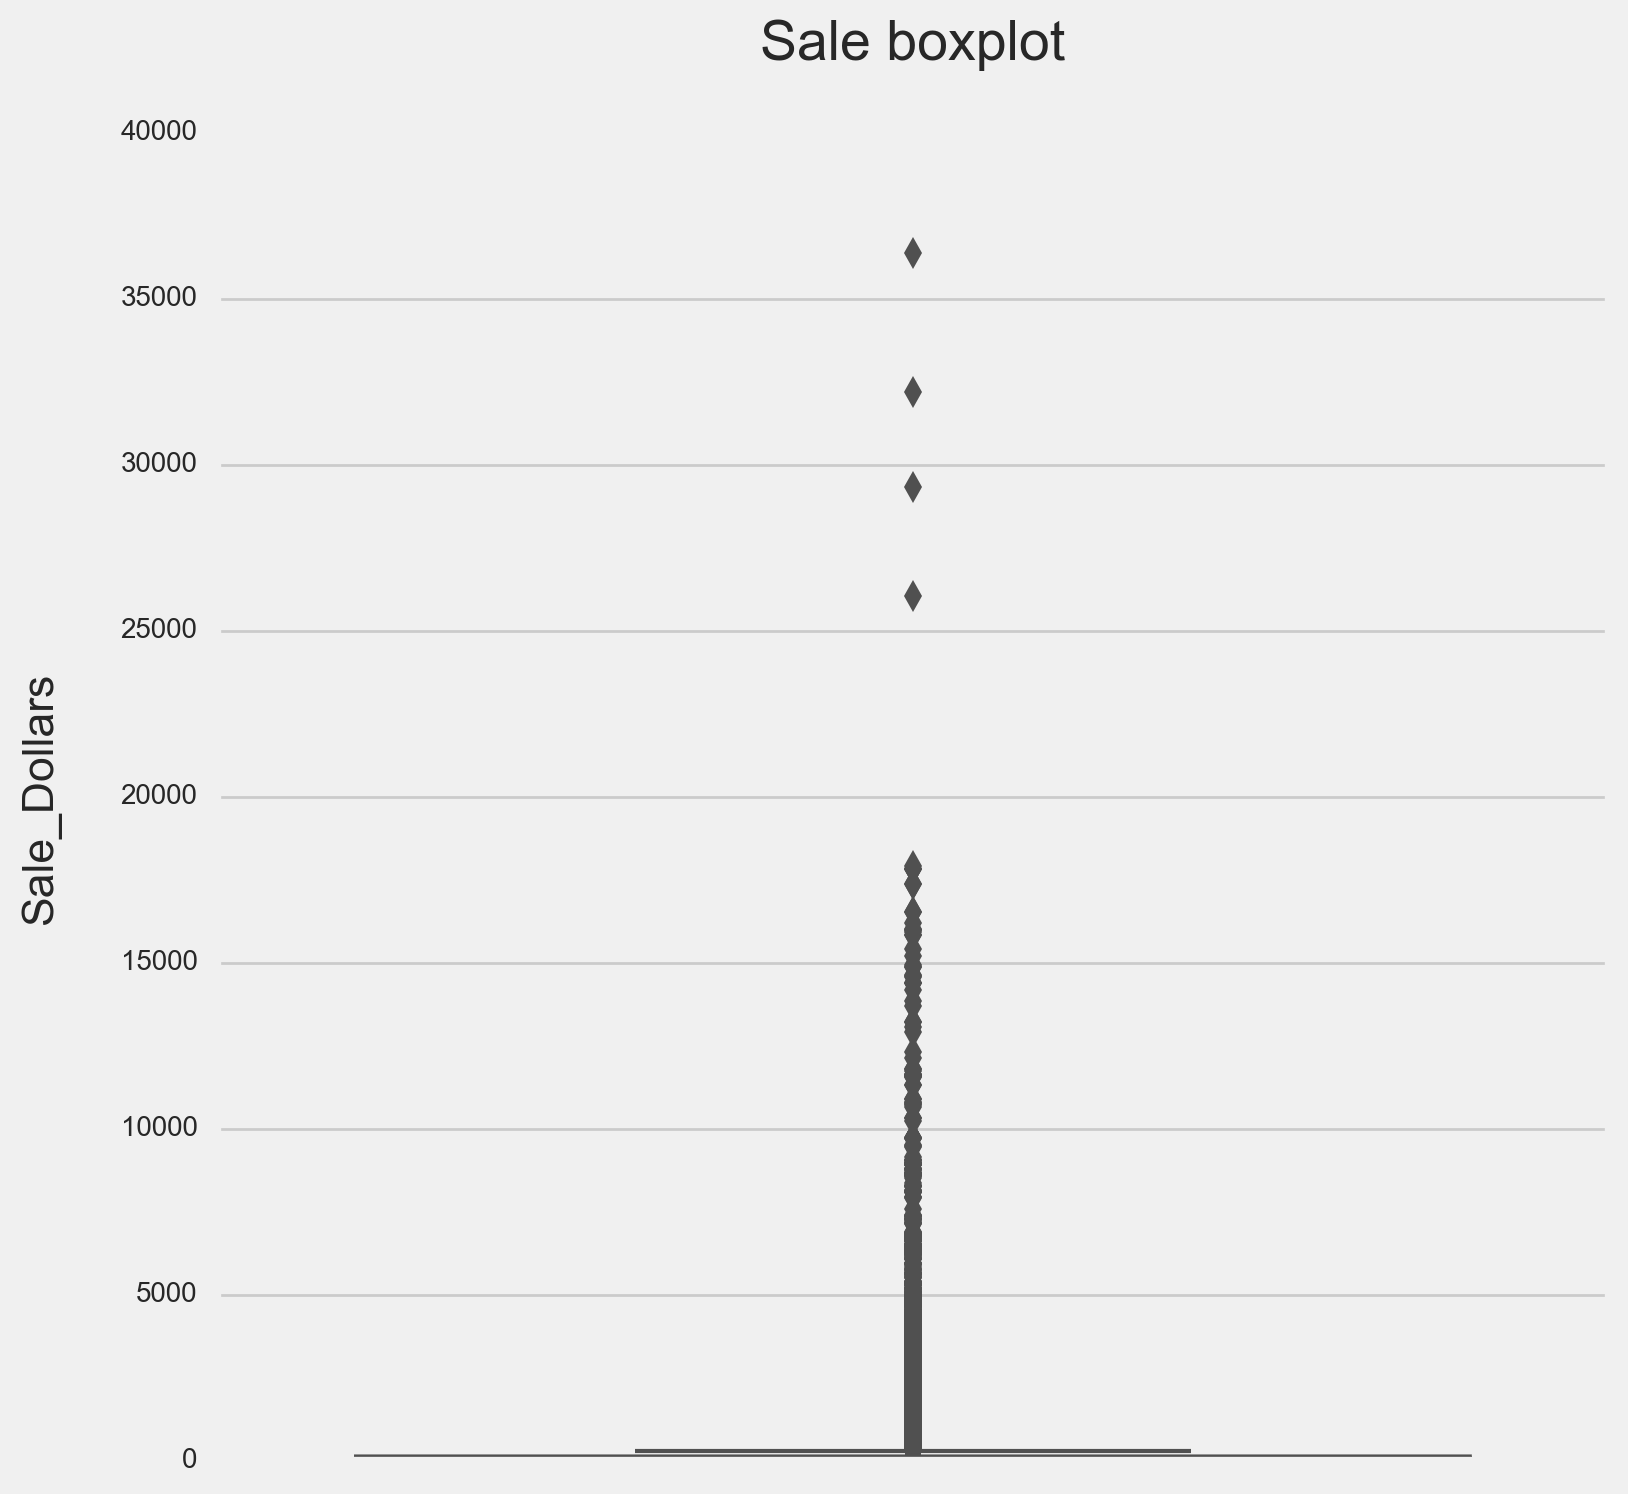

In [290]:
#Detecting outliers.
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

sns.boxplot(iowa.Sale_Dollars, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Sale_Dollars\n', fontsize=16)
ax.set_title('Sale boxplot\n', fontsize=20)

plt.show()

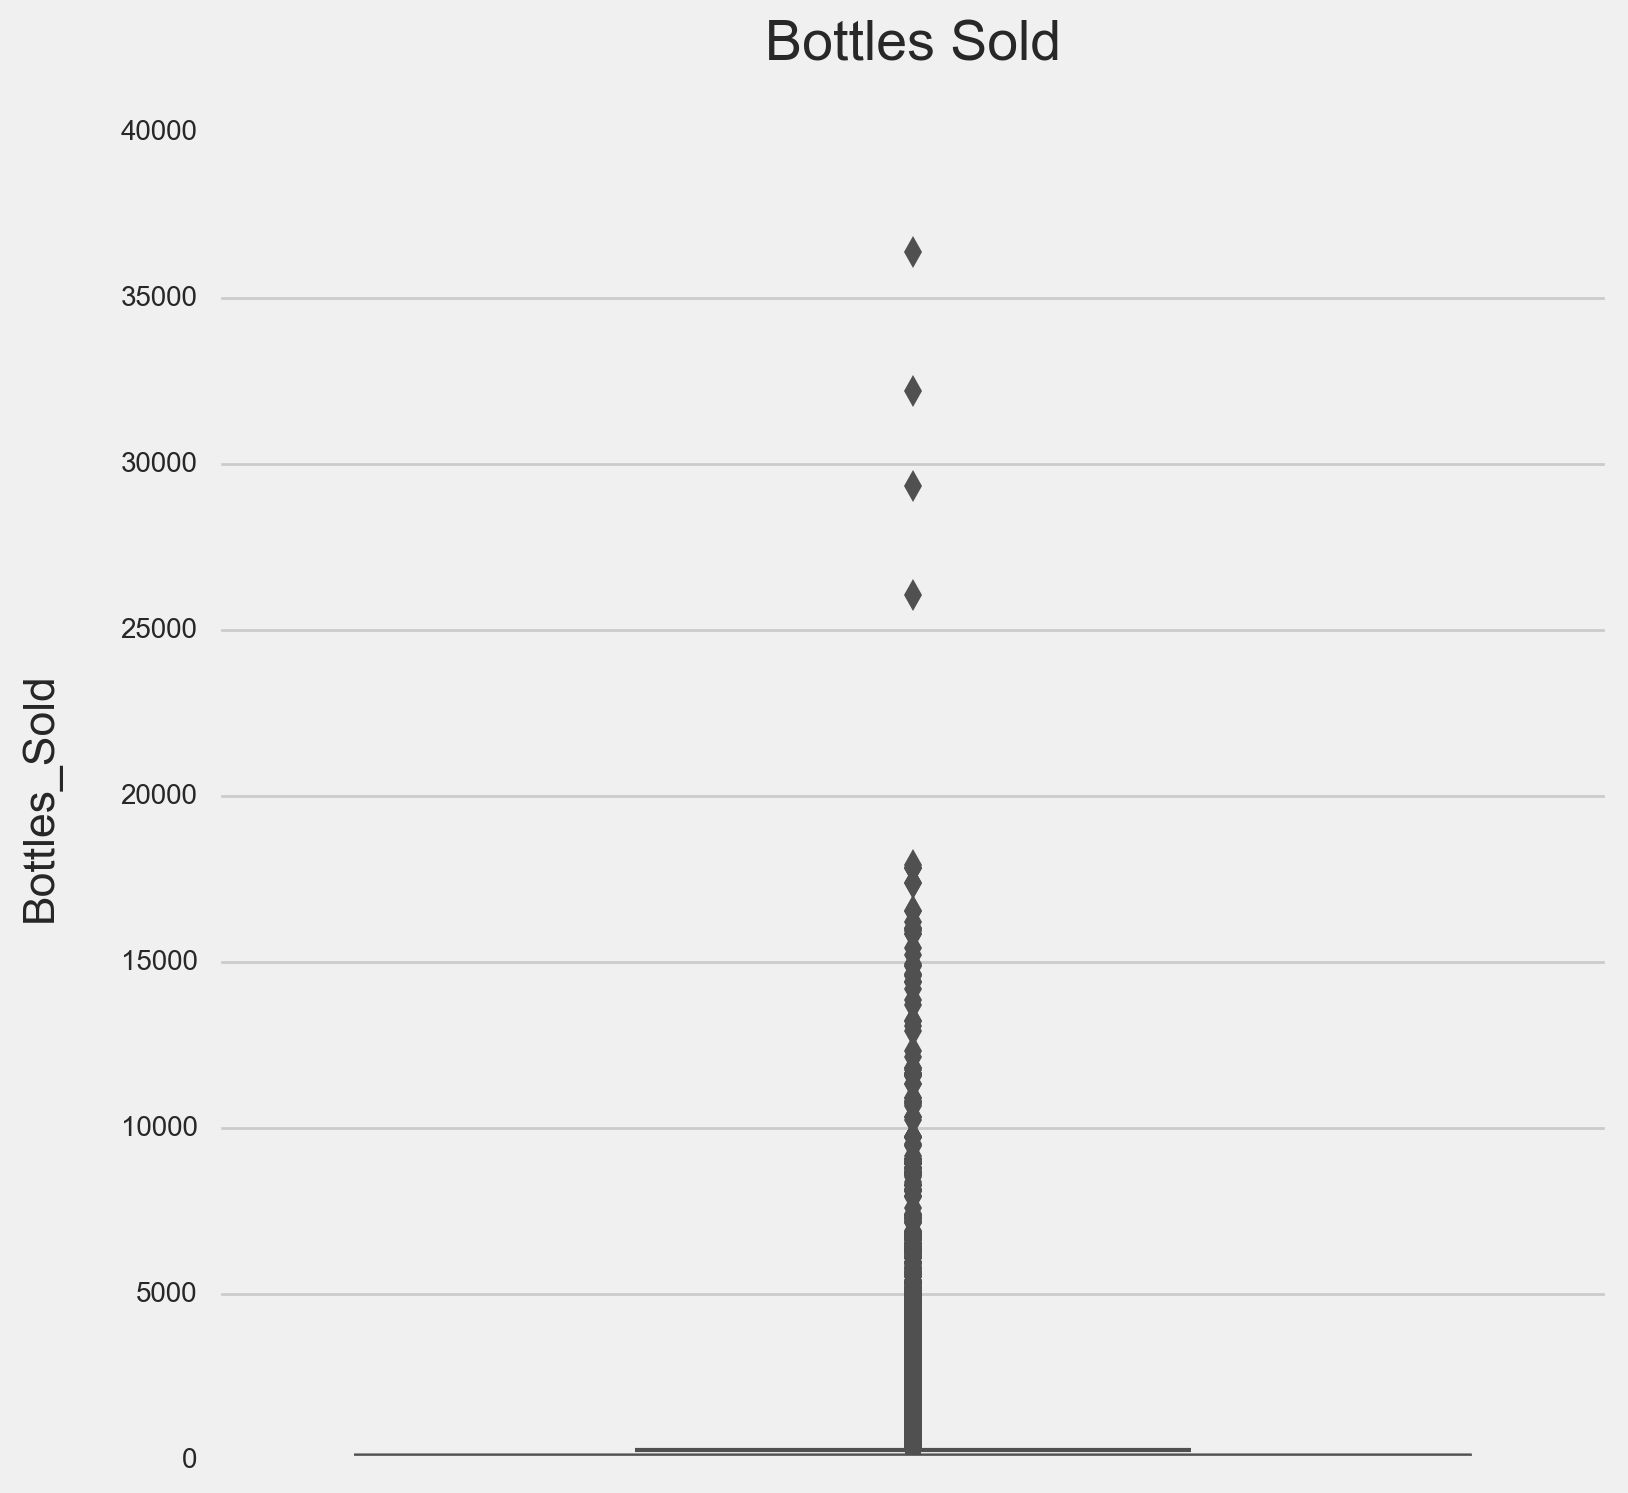

In [291]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()

sns.boxplot(iowa.Sale_Dollars, orient='v',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_ylabel('Bottles_Sold\n', fontsize=16)
ax.set_title('Bottles Sold\n', fontsize=20)

plt.show()

In [292]:
#Removing duplicate
iowa_no_duplicate=iowa.drop_duplicates()

In [293]:
iowa_no_duplicate.shape

(270920, 18)


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [294]:
iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_Dollars                0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [295]:
#Cleaning and arranging the date. 
iowa['Date'] = pd.to_datetime(iowa['Date'])
iowa['Month'] = iowa['Date'].dt.month
iowa['Year']=iowa['Date'].dt.year
iowa

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Month,Year
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,11,2015
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,2,2016
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,2,2016
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,6,2015
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,1,2016
9,2015-11-10,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,11,2015


In [296]:
#Creating a new dataframe with only 2015 data. 
iowa_2015=iowa[iowa['Year'] == 2015]


In [297]:
#Looking to see if all stores have data for the entire year of 2015.
grouped=iowa_2015.groupby(['Store Number', 'Month'])['Sale_Dollars','Volume Sold (Gallons)'].mean()

In [298]:
grouped[0:4]

Sale_Dollars  Volume Sold (Gallons)
Store Number Month                                     
2106         1        308.359091               5.024318
             2        306.503333               5.851429
             3        298.752326               4.664651
             4        271.769545               6.221818

The above table shows the sum of all the sales entries each store has recorded each month. Stores have multiple entries each month. 


In [299]:
#Creating a dummy in order to observe stores which have reports or data for the whole entire 12 months (one year).
iowa_2015_new=iowa_2015.groupby(['Store Number'])['Month'].nunique().reset_index()
iowa_2015_new[0:8]

,Store Number,Month
0,2106,12
1,2113,12
2,2130,12
3,2152,12
4,2178,12
5,2190,12
6,2191,12
7,2200,12


In [300]:
#If a store has entries for all the 12months, itis considered as one and 0 otherwise. This command help to separate stores with 12monts entries from the ones that do not have entires for the whole 12months.
iowa_2015_new['Monthdummy']= iowa_2015_new['Month']
iowa_2015_new.loc[iowa_2015_new.Monthdummy == 12, 'Monthdummy']=1
iowa_2015_new[0:8]

,Store Number,Month,Monthdummy
0,2106,12,1
1,2113,12,1
2,2130,12,1
3,2152,12,1
4,2178,12,1
5,2190,12,1
6,2191,12,1
7,2200,12,1


In [301]:
iowa2015=pd.merge(iowa_2015_new, iowa_2015, on=['Store Number'], how='left')
iowa2015.head(5)

,Store Number,Month_x,Monthdummy,Date,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Month_y,Year
0,2106,12,1,2015-08-20,CEDAR FALLS,50613,7.0,Black Hawk,1032080.0,IMPORTED VODKA,370,34007,Absolut Swedish Vodka 80 Prf,1000,14.99,22.49,36,809.64,36.0,9.51,8,2015
1,2106,12,1,2015-03-12,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,85,22216,Woodford Reserve Bourbon,750,21.02,31.53,6,189.18,4.5,1.19,3,2015
2,2106,12,1,2015-07-30,CEDAR FALLS,50613,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,260,69947,Rumple Minze Peppermint Schnapps Liqueur,1000,15.75,23.63,12,283.56,12.0,3.17,7,2015
3,2106,12,1,2015-01-22,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,434,30527,Hawkeye Gin,1000,4.23,6.35,12,76.20,12.0,3.17,1,2015
4,2106,12,1,2015-08-13,CEDAR FALLS,50613,7.0,Black Hawk,1081317.0,GRAPE SCHNAPPS,65,82637,Dekuyper Grape Pucker,1000,7.62,11.43,12,137.16,12.0,3.17,8,2015


5. Case 1 - Proposals for new tax rates 

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

5.1 Calculate yearly liquor sales for each store in 2015.

In [302]:
#Calculating the cost for stores with 12 months entries in 2015.
iowa2015['Cost']=iowa2015.Bottles_Sold * iowa2015.State_Bottle_Cost


In [303]:
#Renaming the Volume Sold (Gallons) variable.
iowa2015= iowa2015.rename(index=str, columns={ "Volume Sold (Gallons)": "Volume_Sold_Gallons"})

In [304]:
#Creating a new dataframe.
iowa2015_new=iowa2015.groupby(['Store Number','Monthdummy'])['Sale_Dollars','Cost', 'Volume_Sold_Gallons'].sum().reset_index()
iowa2015_new[0:5]
                                                     

,Store Number,Monthdummy,Sale_Dollars,Cost,Volume_Sold_Gallons
0,2106,1,146326.22,97488.14,2571.33
1,2113,1,9310.22,6201.18,174.29
2,2130,1,111871.43,74546.23,1820.65
3,2152,1,7721.08,5133.55,167.28
4,2178,1,24324.18,16158.48,506.50


### 5.2 Calculate the profit each store is making in 2015.


In [305]:
#Calculating the profit.
iowa2015_new['Profit']=iowa2015_new.Sale_Dollars - iowa2015_new.Cost


In [306]:
iowa2015_new[0:4]


,Store Number,Monthdummy,Sale_Dollars,Cost,Volume_Sold_Gallons,Profit
0,2106,1,146326.22,97488.14,2571.33,48838.08
1,2113,1,9310.22,6201.18,174.29,3109.04
2,2130,1,111871.43,74546.23,1820.65,37325.20
3,2152,1,7721.08,5133.55,167.28,2587.53


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [307]:
#Checking for all my variables in the dataset.
pd.set_option('display.max_columns', 500)
iowa2015_new.head(1)

,Store Number,Monthdummy,Sale_Dollars,Cost,Volume_Sold_Gallons,Profit
0,2106,1,146326.22,97488.14,2571.33,48838.08


In [308]:
#Calculating the profit per gallons sold of each store in 2015.
iowa2015_new['ProfitPerGallon'] =iowa2015_new.Profit/iowa2015_new.Volume_Sold_Gallons

In [309]:
iowa2015_new[0:5]

,Store Number,Monthdummy,Sale_Dollars,Cost,Volume_Sold_Gallons,Profit,ProfitPerGallon
0,2106,1,146326.22,97488.14,2571.33,48838.08,18.993315
1,2113,1,9310.22,6201.18,174.29,3109.04,17.838315
2,2130,1,111871.43,74546.23,1820.65,37325.20,20.501030
3,2152,1,7721.08,5133.55,167.28,2587.53,15.468257
4,2178,1,24324.18,16158.48,506.50,8165.70,16.121816


In [310]:
iowa_2015_new1=iowa_2015.groupby(['County'])['Month'].nunique().reset_index()
iowa_2015_new1[0:10]

,County,Month
0,Adair,12
1,Adams,12
2,Allamakee,12
3,Appanoose,12
4,Audubon,12
5,Benton,12
6,Black Hawk,12
7,Boone,12
8,Bremer,12
9,Buchanan,12


In [311]:
iowa_2015_new1['Monthdummy']= iowa_2015_new1['Month']
iowa_2015_new1.loc[iowa_2015_new1.Monthdummy == 12, 'Monthdummy']=1

In [312]:
iowa20155=pd.merge(iowa_2015_new1, iowa_2015, on=['County'], how='left')
iowa20155.head(8)

,County,Month_x,Monthdummy,Date,Store Number,City,Zip Code,County Number,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Month_y,Year
0,Adair,12,1,2015-10-26,3461,STUART,50250,1.0,1012100.0,CANADIAN WHISKIES,55,12408,Canadian Ltd Whisky,1750,7.94,12.51,6,75.06,10.50,2.77,10,2015
1,Adair,12,1,2015-03-23,3461,STUART,50250,1.0,1031080.0,VODKA 80 PROOF,434,36307,Hawkeye Vodka,1000,4.05,6.08,12,72.96,12.00,3.17,3,2015
2,Adair,12,1,2015-07-20,4654,STUART,50250,1.0,1032080.0,IMPORTED VODKA,370,34001,Absolut Swedish Vodka 80 Prf Mini,600,7.92,11.88,2,23.76,1.20,0.32,7,2015
3,Adair,12,1,2015-09-04,3461,STUART,50250,1.0,1011200.0,STRAIGHT BOURBON WHISKIES,421,16516,Ancient Age Bourbon,750,6.16,9.24,3,27.72,2.25,0.59,9,2015
4,Adair,12,1,2015-10-27,4317,GREENFIELD,50849,1.0,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,35,43128,Bacardi Superior Rum,1750,15.00,22.50,6,135.00,10.50,2.77,10,2015
5,Adair,12,1,2015-12-28,4317,GREENFIELD,50849,1.0,1062310.0,SPICED RUM,259,43984,Admiral Nelson Cherry Spiced Rum,750,5.78,8.67,1,8.67,0.75,0.20,12,2015
6,Adair,12,1,2015-04-13,3461,STUART,50250,1.0,1081330.0,PEACH SCHNAPPS,65,82846,Dekuyper Luscious Peachtree Schnapps,750,6.30,9.45,3,28.35,2.25,0.59,4,2015
7,Adair,12,1,2015-09-22,4620,FONTANELLE,50846,1.0,1081600.0,WHISKEY LIQUEUR,259,86626,Cold Spell Mint Whiskey,750,7.47,11.21,12,134.52,9.00,2.38,9,2015


In [313]:
iowa20155= iowa20155.rename(index=str, columns={ "Volume Sold (Gallons)": "Volume_Sold_Gallons"})

In [314]:
iowa20155['cost']=iowa20155.Bottles_Sold * iowa20155.State_Bottle_Cost

iowa2015county= iowa20155.groupby(['County','Monthdummy'])['Sale_Dollars','cost', 'Volume_Sold_Gallons'].sum().reset_index()
iowa2015county['Profit']=iowa2015county.Sale_Dollars - iowa2015county.cost
iowa2015county['profitpergallons']=iowa2015county.Profit/iowa2015county.Volume_Sold_Gallons


In [315]:
iowa2015county[0:4]

,County,Monthdummy,Sale_Dollars,cost,Volume_Sold_Gallons,Profit,profitpergallons
0,Adair,1,43747.18,29126.29,927.11,14620.89,15.770394
1,Adams,1,10245.14,6827.47,216.98,3417.67,15.751083
2,Allamakee,1,79918.47,53148.23,1661.77,26770.24,16.109474
3,Appanoose,1,77033.64,51294.34,1669.39,25739.30,15.418386


The above table displays the profit per gallons in each county.

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [316]:
#Creating a new variable "size", based on gallons sold. 
iowa2015.Size=iowa2015.groupby(['Store Number','Monthdummy']).sum()['Volume_Sold_Gallons'].reset_index()

In [317]:
iowa2015.Size[0:4]

,Store Number,Monthdummy,Volume_Sold_Gallons
0,2106,1,2571.33
1,2113,1,174.29
2,2130,1,1820.65
3,2152,1,167.28


In [318]:
#Calculating the size profit ratio.
iowa2015_new['Size_Profit_ratio']=iowa2015_new.Profit/iowa2015_new.Volume_Sold_Gallons

In [319]:
iowa2015_new.Size_Profit_ratio[0:4]

0    18.993315
1    17.838315
2    20.501030
3    15.468257
Name: Size_Profit_ratio, dtype: float64

In [320]:
SizeR=iowa2015_new.groupby(['Store Number','Size_Profit_ratio'], sort=True)[['Volume_Sold_Gallons']].sum().sort_values(by=['Volume_Sold_Gallons'], ascending=False).reset_index()

In [321]:
SizeR[0:20]

,Store Number,Size_Profit_ratio,Volume_Sold_Gallons
0,2633,20.409422,16356.02
1,4829,21.848529,13419.53
2,3385,17.735733,8338.23
3,2512,20.463769,6848.37
4,3420,17.703841,6642.25
5,3952,22.588942,4924.10
6,3354,18.401580,4360.75
7,2670,20.725712,3664.32
8,2593,18.124991,3541.93
9,3447,18.136771,3456.14


The Table above shows the profit to store size ratio, which do not seem consistent. Meaning the size of the store do not determine the profit. 

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [322]:
#Creating new categories of drinks. 
iowa2015['categories'] = np.where(iowa2015['Category Name'].str.contains('CANADIAN WHISKIES'), "CANADIAN WHISKIES",
      np.where(iowa2015['Category Name'].str.contains('WATERMELON SCHNAPPS') , "WATERMELON SCHNAPPS",
      np.where(iowa2015['Category Name'].str.contains('STRAIGHT BOURBON WHISKIES'), "STRAIGHT BOURBON WHISKIES",  
      np.where(iowa2015['Category Name'].str.contains('SPICED RUM'), "SPICED RUM", "Other" ))))

iowa2015.groupby(['categories']).count()['Category'].reset_index()

,categories,Category
0,CANADIAN WHISKIES,21755
1,Other,172158
2,SPICED RUM,11791
3,STRAIGHT BOURBON WHISKIES,12445
4,WATERMELON SCHNAPPS,378


### 5.6 Do relationships exist between the broader liquor type and profit?

In [323]:
Iowa2015n=pd.merge(iowa2015, iowa2015_new , on=['Store Number'], how='left')

In [324]:
Iowa2015n[0:5]

,Store Number,Month_x,Monthdummy_x,Date,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars_x,Volume Sold (Liters),Volume_Sold_Gallons_x,Month_y,Year,Cost_x,categories,Monthdummy_y,Sale_Dollars_y,Cost_y,Volume_Sold_Gallons_y,Profit,ProfitPerGallon,Size_Profit_ratio
0,2106,12,1,2015-08-20,CEDAR FALLS,50613,7.0,Black Hawk,1032080.0,IMPORTED VODKA,370,34007,Absolut Swedish Vodka 80 Prf,1000,14.99,22.49,36,809.64,36.0,9.51,8,2015,539.64,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315
1,2106,12,1,2015-03-12,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,85,22216,Woodford Reserve Bourbon,750,21.02,31.53,6,189.18,4.5,1.19,3,2015,126.12,STRAIGHT BOURBON WHISKIES,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315
2,2106,12,1,2015-07-30,CEDAR FALLS,50613,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,260,69947,Rumple Minze Peppermint Schnapps Liqueur,1000,15.75,23.63,12,283.56,12.0,3.17,7,2015,189.00,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315
3,2106,12,1,2015-01-22,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,434,30527,Hawkeye Gin,1000,4.23,6.35,12,76.20,12.0,3.17,1,2015,50.76,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315
4,2106,12,1,2015-08-13,CEDAR FALLS,50613,7.0,Black Hawk,1081317.0,GRAPE SCHNAPPS,65,82637,Dekuyper Grape Pucker,1000,7.62,11.43,12,137.16,12.0,3.17,8,2015,91.44,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315


In [325]:
profit_relation = Iowa2015n.groupby(['categories']).mean()["Profit"].reset_index()
profit_relation.rename(columns={
 'Profit':'profit_relation'  
  }, inplace=True)
Iowa2015n= pd.merge(Iowa2015n,profit_relation , on=['categories'], how='right')

In [326]:
Iowa2015n[0:4]

,Store Number,Month_x,Monthdummy_x,Date,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars_x,Volume Sold (Liters),Volume_Sold_Gallons_x,Month_y,Year,Cost_x,categories,Monthdummy_y,Sale_Dollars_y,Cost_y,Volume_Sold_Gallons_y,Profit,ProfitPerGallon,Size_Profit_ratio,profit_relation
0,2106,12,1,2015-08-20,CEDAR FALLS,50613,7.0,Black Hawk,1032080.0,IMPORTED VODKA,370,34007,Absolut Swedish Vodka 80 Prf,1000,14.99,22.49,36,809.64,36.0,9.51,8,2015,539.64,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703
1,2106,12,1,2015-07-30,CEDAR FALLS,50613,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,260,69947,Rumple Minze Peppermint Schnapps Liqueur,1000,15.75,23.63,12,283.56,12.0,3.17,7,2015,189.00,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703
2,2106,12,1,2015-01-22,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,434,30527,Hawkeye Gin,1000,4.23,6.35,12,76.20,12.0,3.17,1,2015,50.76,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703
3,2106,12,1,2015-08-13,CEDAR FALLS,50613,7.0,Black Hawk,1081317.0,GRAPE SCHNAPPS,65,82637,Dekuyper Grape Pucker,1000,7.62,11.43,12,137.16,12.0,3.17,8,2015,91.44,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703


In [327]:
Profit_new = Iowa2015n.groupby(['categories']).sum()["Profit"].reset_index()
Profit_new.rename(columns={
 'Profit':'Profit_new'  
  }, inplace=True)
Iowa2015n= pd.merge(Iowa2015n, Profit_new, on=['categories'], how='right')

In [328]:
#Changing the variable "Volume_Sold_Gallons" to index
Iowa2015n['Volume_Sold_Gallons'] = Iowa2015n.index

In [329]:
Per_Gallons = Iowa2015n.groupby(['categories']).sum()[['Volume_Sold_Gallons']].reset_index()

In [330]:
Per_Gallons

,categories,Volume_Sold_Gallons
0,CANADIAN WHISKIES,4523798799
1,Other,14819102403
2,SPICED RUM,2246161918
3,STRAIGHT BOURBON WHISKIES,2219939100
4,WATERMELON SCHNAPPS,82556901


In [331]:
Iowa2015n.reset_index(level=['Profit_new', 'profit_relation'])

,index,Store Number,Month_x,Monthdummy_x,Date,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars_x,Volume Sold (Liters),Volume_Sold_Gallons_x,Month_y,Year,Cost_x,categories,Monthdummy_y,Sale_Dollars_y,Cost_y,Volume_Sold_Gallons_y,Profit,ProfitPerGallon,Size_Profit_ratio,profit_relation,Profit_new,Volume_Sold_Gallons
0,0,2106,12,1,2015-08-20,CEDAR FALLS,50613,7.0,Black Hawk,1032080.0,IMPORTED VODKA,370,34007,Absolut Swedish Vodka 80 Prf,1000,14.99,22.49,36,809.64,36.00,9.51,8,2015,539.64,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,0
1,1,2106,12,1,2015-07-30,CEDAR FALLS,50613,7.0,Black Hawk,1081390.0,IMPORTED SCHNAPPS,260,69947,Rumple Minze Peppermint Schnapps Liqueur,1000,15.75,23.63,12,283.56,12.00,3.17,7,2015,189.00,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,1
2,2,2106,12,1,2015-01-22,CEDAR FALLS,50613,7.0,Black Hawk,1041100.0,AMERICAN DRY GINS,434,30527,Hawkeye Gin,1000,4.23,6.35,12,76.20,12.00,3.17,1,2015,50.76,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,2
3,3,2106,12,1,2015-08-13,CEDAR FALLS,50613,7.0,Black Hawk,1081317.0,GRAPE SCHNAPPS,65,82637,Dekuyper Grape Pucker,1000,7.62,11.43,12,137.16,12.00,3.17,8,2015,91.44,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,3
4,4,2106,12,1,2015-12-03,CEDAR FALLS,50613,7.0,Black Hawk,1081400.0,TRIPLE SEC,421,86637,Tortilla Triple Sec,1000,3.01,4.52,12,54.24,12.00,3.17,12,2015,36.12,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,4
5,5,2106,12,1,2015-10-08,CEDAR FALLS,50613,7.0,Black Hawk,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,24,450.00,24.00,6.34,10,2015,300.00,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,5
6,6,2106,12,1,2015-04-16,CEDAR FALLS,50613,7.0,Black Hawk,1031080.0,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,12,166.56,12.00,3.17,4,2015,111.00,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,6
7,7,2106,12,1,2015-09-03,CEDAR FALLS,50613,7.0,Black Hawk,1081355.0,STRAWBERRY SCHNAPPS,434,84496,Paramount Strawberry Schnapps,750,4.75,7.13,12,85.56,9.00,2.38,9,2015,57.00,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,7
8,8,2106,12,1,2015-05-07,CEDAR FALLS,50613,7.0,Black Hawk,1081200.0,CREAM LIQUEURS,260,68037,Bailey's Original Irish Cream,1000,17.25,25.88,12,310.56,12.00,3.17,5,2015,207.00,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,8
9,9,2106,12,1,2015-05-21,CEDAR FALLS,50613,7.0,Black Hawk,1022100.0,TEQUILA,205,89533,Familia Camarena Reposado,750,10.00,15.00,5,75.00,3.75,0.99,5,2015,50.00,Other,1,146326.22,97488.14,2571.33,48838.08,18.993315,18.993315,25660.004703,4.417575e+09,9


In [234]:
#Grouping profit by drinks categories in order to determine the relationship.
Per_Gallons_Profit = Iowa2015n.groupby(['categories']).mean()[['Profit_new', 'profit_relation']]
Per_Gallons_Profit.sort(['Profit_new'], ascending=1, inplace=True)
Per_Gallons_Profit

/Users/aminatacissokho/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,Profit_new,profit_relation
categories,,
WATERMELON SCHNAPPS,1.395347e+07,36913.938836
SPICED RUM,1.998302e+08,16947.689339
STRAIGHT BOURBON WHISKIES,3.307255e+08,26574.968853
CANADIAN WHISKIES,3.758898e+08,17225.268959
Other,4.417575e+09,25660.004703


The results shows that the whiskies are more profitable than the other drinks. 


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [ ]:
#The results do not show any relationship between the liquor brand and the sales or profit. All that can be observed is the te relationship between the type of liquor and sales and profit. 

### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [332]:
Iowa2015n.groupby(['Store Number','Volume_Sold_Gallons'], sort=True)[['Profit']].sum().sort_values(by=['Profit'], ascending=False).reset_index()

,Store Number,Volume_Sold_Gallons,Profit
0,2633,56165,333816.91
1,2633,57494,333816.91
2,2633,57507,333816.91
3,2633,57506,333816.91
4,2633,57505,333816.91
5,2633,57504,333816.91
6,2633,57503,333816.91
7,2633,57502,333816.91
8,2633,57501,333816.91
9,2633,57500,333816.91



## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [333]:
#Creating a new dataframe with only 2016 entries.
iowa2016=iowa[iowa['Year'] == 2016]

In [334]:
iowa2016[0:4]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Month,Year
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2,2016
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2,2016
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.0,0.79,1,2016


In [335]:
#Keeping only observations for the first 3 months.
iowa1= iowa2016[(iowa2016.Month <4)]  
iowa1[0:4]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Month,Year
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,3,2016
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2,2016
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2,2016
8,2016-01-04,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.0,0.79,1,2016


In [336]:
#Creating also a separate dataframe for 2015 sal entries and keeping only data for the first 3 months.
iowa2015n=iowa[iowa['Year'] == 2015]
iowa2= iowa2015n[(iowa2015n.Month <4)]  
iowa2[0:4]

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Month,Year
12,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75,0.46,1,2015
19,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,Lord Calvert Canadian Whisky,1750,9.97,14.96,6,89.76,10.50,2.77,3,2015
20,2015-01-16,2590,CEDAR RAPIDS,52402,57.0,Linn,1031200.0,VODKA FLAVORED,971,41474,44 North Huckleberry,750,14.25,21.38,2,42.76,1.50,0.40,1,2015
21,2015-01-13,3942,TOLEDO,52342,86.0,Tama,1012100.0,CANADIAN WHISKIES,115,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,9.00,2.38,1,2015


In [337]:
#Grouping the 2015 new dataframe by county, store and sales.
Q12015=iowa2.groupby(['County','Store Number'], sort=True)[['Sale_Dollars']].sum().sort_values(by=['Sale_Dollars'], ascending=False).reset_index()
Q12015.rename(columns={
       'Sale_Dollars':'2015Sales'
   }, inplace=True)
Q12015[0:4]


,County,Store Number,2015Sales
0,Polk,2633,207012.08
1,Polk,4829,203842.07
2,Linn,3385,105921.75
3,Scott,3952,85840.78


In [338]:
Q12016=iowa1.groupby(['County','Store Number'], sort=True)[['Sale_Dollars']].sum().sort_values(by=['Sale_Dollars'], ascending=False).reset_index()
Q12016.rename(columns={
       'Sale_Dollars':'2016Sales'
   }, inplace=True)
Q12016[0:4]

,County,Store Number,2016Sales
0,Polk,2633,219551.79
1,Polk,4829,210340.17
2,Johnson,2512,112518.79
3,Woodbury,3447,75557.88


In [339]:
#Merging the 2016 and 2015 data in order to observe the changing in sales.
iowa12=pd.merge(Q12015,Q12016,on=['County','Store Number'],how='right')

In [340]:
iowa12[0:10]

,County,Store Number,2015Sales,2016Sales
0,Polk,2633.0,207012.08,219551.79
1,Polk,4829.0,203842.07,210340.17
2,Linn,3385.0,105921.75,64605.54
3,Scott,3952.0,85840.78,59139.45
4,Polk,3420.0,85542.78,50555.40
5,Johnson,2512.0,82117.82,112518.79
6,Dallas,3814.0,56443.62,63118.98
7,Woodbury,3447.0,54233.74,75557.88
8,Woodbury,3820.0,51033.86,25557.03
9,Linn,3773.0,48574.94,66202.79


The table above shows each county quaterly sale in both 2015 and 2016 

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [341]:
Iowa12 = iowa2.append(iowa1, ignore_index=True)
Iowa12

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Volume Sold (Liters),Volume Sold (Gallons),Month,Year
0,2015-01-22,3858,DAVENPORT,52806,82.0,Scott,1012100.0,CANADIAN WHISKIES,65,15248,Windsor Canadian Pet,1750,8.92,13.38,1,13.38,1.75,0.46,1,2015
1,2015-03-04,2614,DAVENPORT,52807,82.0,Scott,1012100.0,CANADIAN WHISKIES,434,13638,Lord Calvert Canadian Whisky,1750,9.97,14.96,6,89.76,10.50,2.77,3,2015
2,2015-01-16,2590,CEDAR RAPIDS,52402,57.0,Linn,1031200.0,VODKA FLAVORED,971,41474,44 North Huckleberry,750,14.25,21.38,2,42.76,1.50,0.40,1,2015
3,2015-01-13,3942,TOLEDO,52342,86.0,Tama,1012100.0,CANADIAN WHISKIES,115,11786,Black Velvet Traveler,750,5.23,7.85,12,94.20,9.00,2.38,1,2015
4,2015-03-24,3981,SIOUX CENTER,51250,84.0,Sioux,1011100.0,BLENDED WHISKIES,260,25606,Seagrams 7 Crown Bl Whiskey,750,7.00,10.50,12,126.00,9.00,2.38,3,2015
5,2015-02-03,3390,MILFORD,51351,30.0,Dickinson,1011300.0,TENNESSEE WHISKIES,85,26827,Jack Daniels Old #7 Black Lbl,1000,17.90,26.85,24,644.40,24.00,6.34,2,2015
6,2015-01-14,2545,IOWA CITY,52245,52.0,Johnson,1081600.0,WHISKEY LIQUEUR,260,66199,Piehole Apple Pie Mini,500,4.90,7.35,1,7.35,0.50,0.13,1,2015
7,2015-01-12,2555,KEOKUK,52632,56.0,Lee,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,65,73533,Dekuyper 03,750,12.07,18.11,2,36.22,1.50,0.40,1,2015
8,2015-01-16,2549,INDIANOLA,50125,91.0,Warren,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,1,2015
9,2015-01-13,2644,FORT DODGE,50501,94.0,Webster,1081305.0,APPLE SCHNAPPS,65,82607,Dekuyper Sour Apple,1000,7.62,11.43,12,137.16,12.00,3.17,1,2015


In [342]:
iowa12.dtypes

County           object
Store Number    float64
2015Sales       float64
2016Sales       float64
dtype: object

In [343]:
#Calculating the growth rate.
iowa12['C'] = ((iowa12['2016Sales'].astype('float') - iowa12['2015Sales'])/iowa12['2015Sales'])*100

In [344]:
iowa12.C


0        6.057477
1        3.187811
2      -39.006351
3      -31.105647
4      -40.900448
5       37.021161
6       11.826598
7       39.318955
8      -49.921425
9       36.290009
10     -26.762981
11     -22.973059
12     -49.798404
13     -15.903382
14      36.328200
15     -51.757126
16     -22.306298
17       0.399516
18      33.365631
19     -38.108263
20      21.193505
21      -3.420215
22       0.710651
23      -4.559935
24       6.551677
25     -16.701555
26      -0.194882
27      85.980389
28      17.189365
29      22.656033
          ...    
1250          NaN
1251          NaN
1252          NaN
1253          NaN
1254          NaN
1255          NaN
1256          NaN
1257          NaN
1258          NaN
1259          NaN
1260          NaN
1261          NaN
1262          NaN
1263          NaN
1264          NaN
1265          NaN
1266          NaN
1267          NaN
1268          NaN
1269          NaN
1270          NaN
1271          NaN
1272          NaN
1273          NaN
1274      

In [345]:
iowa12.head(100)

,County,Store Number,2015Sales,2016Sales,C
0,Polk,2633.0,207012.08,219551.79,6.057477
1,Polk,4829.0,203842.07,210340.17,3.187811
2,Linn,3385.0,105921.75,64605.54,-39.006351
3,Scott,3952.0,85840.78,59139.45,-31.105647
4,Polk,3420.0,85542.78,50555.40,-40.900448
5,Johnson,2512.0,82117.82,112518.79,37.021161
6,Dallas,3814.0,56443.62,63118.98,11.826598
7,Woodbury,3447.0,54233.74,75557.88,39.318955
8,Woodbury,3820.0,51033.86,25557.03,-49.921425
9,Linn,3773.0,48574.94,66202.79,36.290009


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

I will recommend to open a new store in the Pottawattamie county, because the growth rate of sales there is approximately 230%.  

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

The location might change because, the first recommendation was based on the sales. However, it doesn't mean that the store is making that much profit also. Maybe the cost of ordereing the liquor is also to high, making the revenue and the cost to balance out then no revenue. 

References:

https://media.readthedocs.org/pdf/python-guide/latest/python-guide.pdf. I got most of my codes from this document online.

And the rests are from the lectures, and stackflows. 